# 11 Αριθμητική Python - NumPy II

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό το μάθημα θα γίνει εισαγωγή:
    
- στο broadcasting
    
- στους boolean πίνακες και στο masking

- στους τελεστες σύγκρισης    
       
- στην μέθοδος np.where
    
- στο fancy indexing.
    
    
</div>

---

## 11.1 Broadcasting

Είδαμε ότι οι πράξεις πινάκων γίνονται εξ'ορισμού στοιχείο-στοιχείο.  

In [ ]:
import numpy as np

a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b


Αυτό δεν δημιουργεί κανένα πρόβλημα όταν δύο πίνακες έχουν τις ίδιες διαστάσεις και σχήμα.

Ωστόσο, είναι δυνατόν να πραγματοποιηθούν και πράξεις σε πίνακες διαφορετικών σχημάτων, όπως είδαμε ήδη αν πάρουμε ένα πίνακα και ένα βαθμωτό μέγεθος (διανυσματοποίηση / vectorization).

In [ ]:
a + 5

Στο παραπάνω παράδειγμα αυτό που έκανε η Python είναι να θεωρήσει ότι το `5` (που είναι ένας αριθμός) ισοδύναμο με ένα ένα πίνακα μηδενικής διάστασης. Δηλαδή είναι σαν να το μετέτρεψε σε ένα πινακα `(5 5 5)` και να το πρόσθεσε στον πίνακα `a`.

Η διαδικασία μετατροπής / τροποποίησης πινάκων ώστε να έχουν το ίδιο σχήμα για να πραγματοποιηθούν πράξεις μεταξύ πινάκων ονομάζεται **broadcasting**. 

Μοιάζει δηλαδή σαν να "τεντώνει" (επεκτείνει) τις διαστάσεις (επαναλαμβάνοντας τα στοιχεία) έτσι ώστε να αποκτήσουν το ίδιο σχήμα. (Τα παρακάτω παραδείγματα προέρχονται από το επίσημο [εγχειρίδιο της NumPy](https://numpy.org/doc/stable/user/basics.broadcasting.html).)

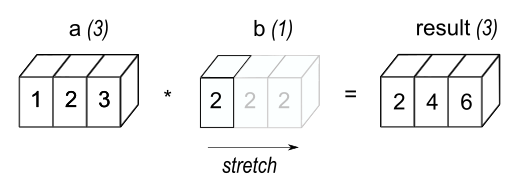

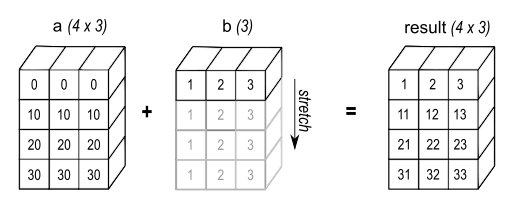

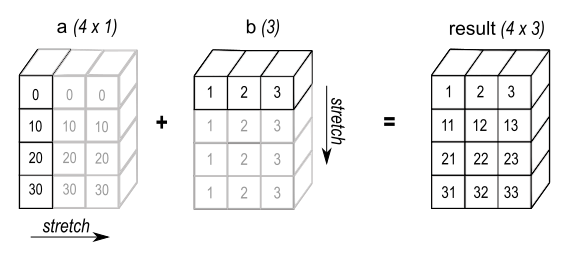

Ανάλογα με τις διαστάσεις των πινάκων μπορεί _να μην υπάρχει τροποποίηση_ που να επιτρέπεται ώστε να γίνει η πράξη.

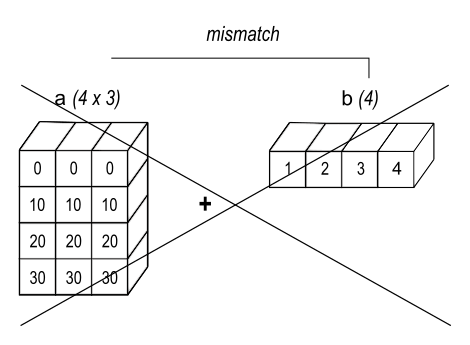

### 11.1.1 Βήματα broadcasting

Για να μπορέσει να λειτουργήσει το broadcasting θα πρέπει να ελέγξουμε αν οι δύο πίνακες έχουν το ίδιο σχήμα (διαστάσεις) και στην περίπτωση που δεν έχουν να ελέγξουμε αν μπορούν να τροποποιηθούν ώστε να αποκτήσουν. 

Υπάρχουν τρία βήματα / κανόνες που διέπουν την διαδικασία του broadcasting: 

**Βήμα 1:** Ελέγχουμε διαστάσεις. Ο πίνακας με τις λιγότερες διαστάσεις επεκτείνεται στην αριστερή του μεριά με 1 (προσθέτουμε μια διάσταση δηλαδή ίση με την 1).

**Βήμα 2:** Αν το σχήμα των δύο πινάκων δεν ταιριάζει σε κάποια από τις διαστάσεις, τότε  ο πίνακας/οι πίνακες με μοναδιαίες διαστάσεις επεκτείνεται/επεκτέινονται, έτσι ώστε να ταιριάξουν τα σχήματα. Στη συνέχεια πραγματοποιείται η πράξη.

**Βήμα 3:** Αν οι διαστάσεις τους διαφέρουν (χωρίς καμία από αυτές να είναι 1) τότε προκύπτει σφάλμα (`ValueError`). 

_Σημαντική σημείωση:_ τα παραπάνω βήματα αφορούν τις **διαστάσεις** και όχι τις ίδιες τις τιμές (που επεκτείνονται με βάση τις τιμές που έχει η υπάρχουσα διάσταση).

Για να ξεκαθαρίσουν τα παραπάνω ας δούμε μερικά παραδείγματα. 

**-- Περίπτωση 1**


Πρόσθεση ενός διδιάστατου πίνακα με ένα μονοδιάστατο. 

In [ ]:
td = np.ones((2,3))
od = np.arange(3)

print(td)
print(od)

In [ ]:
print(td.shape)
print(od.shape)

Σύμφωνα με τον Κανόνα 1 ο πίνακας `od` έχει λιγότερες διαστάσεις. Οπότε θα τον επεκτείνουμε από τα αριστερά, και θα έχουμε

`td.shape > (2,3)`

`od.shape > (1,3)`

Σύμφωνα με το βήμα 2 βλέπουμε ότι η πρώτη διάσταση (μεταξύ των δύο πινάκων) διαφωνεί. Άρα θα πρέπει να την επεκτείνουμε και αυτή ώστε να ταυτιστούν. 

`td.shape > (2,3)`

`od.shape > (2,3)`

Τα σχήματα τώρα είναι ίδια οπότε ο τελικός πίνακας θα έχει το σχήμα `(2,3)`. 

In [ ]:
td + od

**-- Περίπτωση 2**


Πρόσθεση δύο πινάκων όπου πρέπει να δουλέψουμε και με τους δύο.

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

print(a)
print(b)

In [ ]:
print(a.shape)
print(b.shape)

Τα σχήματα των δύο πικάνων διαφέρουν με τον b να έχει τις λιγότερες διαστάσεις. Οπότε τον επεκτείνουμε με 1 από τα αριστερά. 

`a.shape > (3,1 )`

`b.shape > (1,3)`

Σύμφωνα με το βήμα 2 βλέπουμε ότι και η πρώτη αλλά και η δεύτερη διάσταση διαφέρουν. Άρα θα πρέπει να επεκτείνουμε την διάσταση που είναι 1 σε κάθε πίνακα, έτσι ώστε να ταυτιστούν. 

`a.shape > (3,3)`

`b.shape > (3,3)`

Τα σχήματα τώρα είναι ίδια οπότε ο τελικός πίνακας θα έχει σχήμα `(3,3)`. 

In [ ]:
a + b

**-- Περίπτωση 3**


Πρόσθεση δύο πινάκων που δεν δουλεύει.

In [ ]:
Ma = np.ones((3, 2))
mm = np.arange(3)

print(Ma)
print(mm)

In [ ]:
print(Ma.shape)
print(mm.shape)

Σύμφωνα με το πρώτο βήμα θα τροποποιήσουμε πρώτα τον mm πίνακα επεκτείνοντας κατά 1 διάσταση από τα αριστερά του. Οπότε και θα έχουμε 

`Μa.shape > (3,2)`

`mm.shape > (1,3)`

Σύμφωνα με το δεύτερο βήμα θα δουλέψουμε με τον πίνακα που έχει μοναδιαία διάσταση και θα την επεκτείνουμε έτσι ώστε να ταυτιστεί με την αντίστοιχη διάσταση του άλλου πίνακα. Οπότε θα τροποποιήσουμε τον πίνακα mm και έτσι θα έχουμε

`Μa.shape > (3,2)`

`mm.shape > (3,3)`

Τελικά όμως οι δύο αυτοί πίνακες δεν έχουν το ίδιο σχήμα. Άρα το broadcasting εδώ εγείρει σφάλμα.



In [ ]:
Ma + mm

Κάποιος/κάποια θα μπορούσε να σχολιάσει εδώ ότι αντί να επεκτείνουμε τον πίνακα mm από τα αριστερά θα μπορούσε να γίνει από τα δεξιά. Ωστόσο δεν ακολουθεί τους παραπάνω κανόνες. και έτσι δεν επιτρέπεται να γίνει.  

Αλλά, μπορούμε εμείς να τροποποιήσουμε τον πίνακαι και να γίνει.  


In [ ]:
mm_res = mm.reshape((3, 1))

print(mm.shape)
print(mm_res.shape)

print(mm_res)
print(Ma)

In [ ]:
Ma + mm_res

**-- Περίπτωση 4**


In [ ]:
mb1 = np.ones((3,1,6,1))
mb2 = np.ones((7,1,5)) 

print(mb1)
print(mb2)

In [ ]:
print(mb1.shape)
print(mb2.shape)

Σύμφωνα με το πρώτο βήμα θα τροποποιήσουμε πρώτα τον mb2 πίνακα επεκτείνοντας κατά 1 διάσταση από τα αριστερά του. Οπότε και θα έχουμε 

`mb1.shape > (3,1,6,1)`

`mb2.shape > (1,7,1,5)`

Σύμφωνα με το δεύτερο βήμα θα δουλέψουμε και με τους δύο πίνακες πίνακες που έχουν μοναδιαίες διαστάσεις και θα τις επεκτείνουμε. Οπότε θα πάρουμε:

`mb1.shape > (3,7,6,5)`

`mb2.shape > (3,7,6,5)`

Οπότε έχοντας τις ίδιες διαστάσεις μπορεί να γίνει το broadcasting.



In [ ]:
mbig = mb1 + mb2

print(mbig)
print(mbig.shape)

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.1</b>
    
Δίνονται τα παρακάτω σχήματα πινάκων. Σε ποιες περιπτώσεις θα πετύχει το broadcasting; Σκεφτείτε με βάση τα παραπάνω βήματα.
    
1. `(6, 7)` και `(7,)`

2. `(6, 7)` και `(3,)`
 
3. `(2, 3)` και `(2,)`

4. `(3, )` και `(2, 3)`  
    
5. `(6, 7)` and `(6, )`    

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Απαντήσεις</summary></b>

1. `(6, 7)` και `(7,)` 
Ναι! Βήμα 1 `(1,7)`, βήμα 2 `(6, 7)` 

2. `(6, 7)` και `(3,)`
Όχι. Βήμα 1 `(1, 3)` βήμα 2 `(6, 3)`    
 
3. `(2, 3)` και `(2,)`
Όχι. Βήμα 1 `(1, 2)` βήμα 2 `(2, 2)`    

4. `(3, )` και `(2, 3)`  
Ναι! Βήμα 1 `(1, 3)` βήμα 2 `(2, 3)`    
    
5. `(6, 7)` and `(6, )`    
Όχι. Βήμα 1 `(1, 6)` βήμα 2 `(6, 6)`    
    
    
</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.2</b>
    
Δίνονται οι παρακάτω πίνακες. Σε κάθε περίπτωση σκεφτείτε πρώτα πως θα πρέπει να γίνει το broadcasting. Σημειώστε πρώτα χειροκίνητα τα βήματα και τα σχήματα  που προκύπτουν από το κάθε βήμα και στη συνέχεια υπολογίστε το τελικό αποτέλεσμα. 
    
    
Στο τέλος τρέξτε τον κώδικα και δείτε αν το θεωρητικό σας αποτέλεσμα ταυτίζεται με αυτό που κάνει η Python.
    
Α. Πολλαπλασισμός arr1 * arr2, για:
    
`arr1 = np.array([10, 20, 30])`    
 
`arr2 = np.array([[1, 2, 3], [4, 5, 6]])`    
    
B. Αφαίρεση arr3 - arr4, για:
       
`arr3 = np.array([[1, 2], [3, 4], [5, 6]])` 
    
`arr4 = np.array([1, 2])`
<br>
    
    
> **TIP:** θυμηθείτε ότι στα βήματα (για να επιβεβαιώσουμε αν μπορεί να γίνει το boradcasting και τι σχήμα θα έχει ο τελικός πίνακας) μιλάμε για τις διαστάσεις, ενώ η τελική επέκταση γίνεται με τις ίδιες τις τιμές (της κάθε διάστασης).   

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύσεις</summary></b>

A. To arr1 > (3,) και το arr2 > (2,3). Άρα ξεκινάμε προσθέτοντας το 1 στα αριστερά του arr1, οπότε και παίρνουμε (1,3). Τώρα επεκτείνουμε την διάσταση 1 του arr1 για να ταυτιστεί με αυτήν του arr2, οπότε και να έχουμε τελικά (2,3). Αφού ταυτίζονται τα σχήματα μπορεί να γίνει το broadcasting. Άρα ο πίνακας arr1 επεκτείνεται (μιλώντας τις για τιμές του πια) σε ένα πίνακα (2,3), δηλαδή
       
`arr1 = np.array([[10, 20, 30],[10, 20, 30]])` 
<br>
    
B. To arr3 > (3,2) και το arr4 > (2,). Άρα ξεκινάμε προσθέτοντας το 1 στα αριστερά του arr4, οπότε και παίρνουμε (1,2). Τώρα επεκτείνουμε την διάσταση 1 του arr4 για να ταυτιστεί με αυτήν του arr3, οπότε και να έχουμε τελικά (3,2). Αφού ταυτίζονται τα σχήματα μπορεί να γίνει το broadcasting. Άρα ο πίνακας arr4 επεκτείνεται (μιλώντας τις για τιμές του πια) σε ένα πίνακα (3,2), δηλαδή 
       
`arr4 = np.array([[1, 2],[1, 2],[1, 2]])`
    
</details>

##  11.2 Boolean πίνακες και Masking

### 11.2.1 Πίνακες με Boolean τιμές

Ένας πίνακας ``NumPy`` μπορεί να δεχτεί, εκτός από αριθμητικές τιμές, και τιμές αληθείας (boolean). 

In [ ]:
a = np.array([True, False, True])
b = np.array([False, False, True])

print(a)
print(b)

Μπορούμε να χρησιμοποιήσουμε και τους λογικούς τελεστές `&` και `|` για να εφαρμόσουμε τις αντίστοιχες πράξεις στοιχείο-στοιχείο. Ο τελεστής `&` επιστρέφει True αν και οι δύο τιμές επιστρέφουν True, ενώ ο `|` επιστρέφει True αν έστω και μια από τις ελεγχόμενες τιμές επιστρέφει True. 

In [ ]:
a = np.array([True, False, True])
b = np.array([False, False, True])

# The following operators implement 'elementwise or' and 'elementwise and'
print(a | b)
print(a & b)

Αντίθετα οι τελεστές `and` και `or` δεν κάνουν αυτό που περιμένουμε, καθώς προσπαθούν να εκτελέσουν τις πράξεις θεωρώντας ολόκληρους τους πίνακες (δηλαδή περιμένουν μία και μόνο τιμή αλήθειας True/False).  

In [ ]:
# They refer to the arrays 'as a whole', not in an elementwise way.
print(a and b)
print(a or b)

### 11.2.2 Τελεστές σύγκρισης

Που μπορεί να είναι χρήσιμοι οι boolean πίνακες; Μπορούμε να εκμεταλλευτούμε τους τελεστές σύγκρισης και να επιστρέψουμε πίνακες αλήθειας ανάλογα με μια συνθήκη. 

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x > 3 # greater than 

In [ ]:
x < 3 # less than 

In [ ]:
x >= 3  # greater than or equal

In [ ]:
x <= 3  # less than or equal

In [ ]:
x != 3  # not equal

In [ ]:
x == 3  # equal

Το ίδιο μπορούμε να κάνουμε και με πίνακες μεγαλύτερων διαστάσεων.

In [ ]:
xx = np.array([[3,4,7,7],[1,4,9,3],[4,8,2,12]])

xx

In [ ]:
xx < 6

### 11.2.3 Κάποιες μέθοδοι 

Υπάρχουν μερικές χρήσιμες μεθόδους που μπορούν να εφαρμοστούν σε συνδυασμό με τους boolean πίνακες. 

#### `np.sum`

Η μέθοδος `numpy.sum` επιστρέφει το άθροισμα των στοιχείων του πίνακα (ή της διάστασης αν επιλεγεί το `axis`). Οταν εφαρμόζεται όμως σε ένα boolean πίνακα τότε επιστρέφει το άθροισμα των στοιχείων που αληθεύουν (και αυτό γιατί το True αντιστοιχεί στο 1 και το False σε 0.

In [ ]:
# how many values less than 6 
# in the whole array ?
np.sum( xx  < 6)

In [ ]:
# how many values less than 6 
# in each row?
np.sum(xx < 6, axis=1)

In [ ]:
# how many values less than 6 
# in each column?
np.sum(xx < 6, axis=0)

#### `np.any` και `np.all`

Οι μέθοδοι `numpy.any` και `numpy.all` δοκιμάζουν αν υπάρχει κάποιο στοιχείο ή όλα τα στοιχεία αντίστοιχα, που να ικανοποιούν μια συνθήκη (θα πρέπει να επιστρέφουν `True`). Αντίστοιχα μπορούν να δουλέψουν ανάλογα με την επιλογή της διάστασης (`axis`).

In [ ]:
# are there any values greater than 8?
np.any(xx > 8)

In [ ]:
# are all values less than 10?
np.all(xx > 10)

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.3</b>
    
Δημιουργήστε ένα διατεταγμένο πίνακα με 28 στοιχεία και σχήμα (4,7). Βρείτε στη συνέχεια πόσα στοιχεία είναι:
    
1. μεγαλύτερα του 14
    
2. μικρότερα του 5
     
3. μεγαλύτερα του 10 σε κάθε γραμμή     
    
4. μικρότερα του 20 σε κάθε στήλη.    
  

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύση</summary></b>

```python
a = np.arange(28).reshape((4,7))
print(a)
print()

print("1:", np.sum( a > 14 ) )
print("2:", np.sum( a < 5 ) )
print("3:", np.sum( a > 10, axis=1 ) )
print("4:", np.sum( a < 20, axis=0 ) )
```                           
    
</details>

### 11.2.4 Masking

Έχοντας την δυνατότητα να βρούμε ποιες τιμές ενός πίνακα ικανοποιούν μια συνθήκη μπορούμε να χρησιμοποιήσουμε τους boolean πίνακες που προκύπτουν ώστε να πάρουμε υποπίνακες (ή να κάνουμε μια επιλογή στα δεδομένα μας).

In [ ]:
xx

In [ ]:
xx < 5


Για να επιλέξουμε τα στοιχεία του **αρχικού** πίνακα (`xx`) τότε μπορούμε να χρησιμοποιοήσουμε τον boolean πίνακα για να τεμαχίσουμε τον αρχικό. Αυτή η διαδικασία είναι γνωστή ως **masking** (μασκάρισμα).

In [ ]:
xx[xx < 5]

Προσοχή ότι επιστρέφεται ένα 1D πίνακας με τις τιμές πλέον του αρχικού πίνακα. Δηλαδή όλες οι τιμές που επιστρέφουν `True` όταν εφαρμόζεται η συνθήκη `xx < 5`. 

Έχοντας κάνει μια επιλογή στοιχείων (δεδομένων) μπορούμε να προχωρήσουμε σε οποιαδήποτε περαιτέρω επεξεργασία αυτών θέλουμε. 

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.4</b>
    
Χρησιμοποιώντας τον προηγούμενο πίνακα της άσκησης 11.3 (διατεταγμένο πίνακα με 28 στοιχεία και σχήμα (4,7)), βρείτε:
    
1. Το άθροισμα όλων των στοιχείων που είναι μεγαλύτερα του 11.
    
2. Τα τετράγωνα όλων των στοιχείων που είναι μικρότερα του 6.
     
3. Την διαφορά του αθροίσματος των στοιχείων που είναι μεγαλύτερα του 20 με το άθροισμα των στοιχείων που είναι μικρότερα του 10.
  

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύση</summary></b>

```python
a = np.arange(28).reshape((4,7))
print(a)
print()

sel1 = (a > 11)
print('selecting:', a[sel1])
print("1:", np.sum(a[sel1]))
print()

sel2 = (a < 6)
print('selecting:', a[sel2])
print("2:", a[sel2]**2)
print()

selbig = (a>20) 
a_selbig = a[selbig]
print(a_selbig)
selsml = (a<10) 
a_selsml = a[selsml]
print(a_selsml)
print("3:", np.sum(a_selbig) - np.sum(a_selsml))
```                           
    
</details>

### 11.2.5 Σύνθετες μάσκες

Έχοντας την δυνατότητα τώρα να επιλέξουμε τα στοιχεία ενός πίνακα με όποιον τρόπο θέλουμε, μπορούμε να κάνουμε και ποιο σύνθετους συνδυασμούς.

In [ ]:
xx

In [ ]:
mask1 = (xx > 4) & (xx < 9)
print(mask1)
print()
print(xx[mask1])

In [ ]:
mask2 = (xx <2) | (xx > 8) 
print(mask2)
print()
print(xx[mask2])

In [ ]:
mask3 = (xx == 4) | (xx == 2) 
print(mask3)
print()
print(xx[mask3])

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.5</b>
    
Δημιουργήστε ένα τυχαίο 1D πίνακα από 20 ακεραίους (με τιμές από -10 έως 10). 

1. Δημιουργήστε μια μάσκα για όσα στοιχεία είναι μεγαλύτερα του 0 και τυπώστε την μάσκα και τα στοιχεία (τιμές του πίνακα). 
    
2. Δημιουργήστε μια πιο σύνθετη μάσκα όπου κρατάτε τα στοιχεία τα οποία βρίσκονται μεταξύ των τιμών -2 και 8 μόνο. Τυπώστε και πάλι την μάσκα και τα στοιχεία.
    
> **TIP:** μπορείτε να χρησιμοποιήσετε την `numpy.random` για την παραγωγή των τυχαίων αριθμών.     
  

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύση</summary></b>

```python
np.random.seed(42)  # this is to allow reproducability of the random generator

x = np.random.randint(-10, 10, 20)
print(x)

print('mask1:')
mask1 = (x > 0)  
print(mask1)
y = x[mask1]     
print(y)

print()
print('mask2:')
mask2 = (x > -2) & (x < 8)  
print(mask2)
print(x[mask2])
```                           
    
</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.6</b>
    
Δημιουργήστε ένα τυχαίο 1D πίνακα από 20 ακεραίους (με τιμές από -10 έως 10). 

1. Αλλάξτε το σχήμα του σε (4,5)
    
2. Δημιουργήστε μια μάσκα επιλέγοντας τα στοιχεία που είναι μεγαλύτερα του 0.
    
3. Αντικαταστήστε τις τιμές στα στοιχεία του αρχικού πίνακα (με οποια τιμή θέλετε) με βάση την μάσκα.    

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύση</summary></b>

```python

np.random.seed(2024)  # this is to allow reproducability of the random generator

print('Initial array:')
k = np.random.randint(-10, 10, 20).reshape(4,5)
print(k, '\n')

print('Mask:')
mask = (k > 0)  
print(mask, '\n')

print('Modified array:')
k[mask] = 999
print(k)   
```                           
    
</details>

## 11.3 `numpy.where`

Η μέθοδος `numpy.where(condition, [x, y,])` παρέχει ένα τρόπο με τον οποίο μπορούμε να εφαρμόσουμε **ταυτόχρονα** μια συνθήκη (`condition`) στα στοιχεία του πίνακα (`x`) στον οποίο εφαρμόζουμε την μέθοδο, καθώς και πως θα αντικαταστήσουμε τα στοιχεία (`y`) που δεν ικανοποιούν την συνθήκη. Δηλαδή, παίρνουμε όλα τα στοιχεία για τα οποία επιστρέφει `True` με βάση την συνθήκη και `y` για όσα επιστρέφει `False`. Τα [x, y] είναι προαιρετικό όρισμα, οπότε αν δεν δοθεί το `x` τότε επιστρέφει τους δείκτες για τους οποίους αληθεύει η συνθήκη. 

_Προσοχή:_ όταν δίνεται το `x` θα πρέπει να δίνεται όλη την μορφή. 

In [ ]:
a = np.arange(1,50,10)
a

In [ ]:
# getting only the indexes
np.where( a<20 )

In [ ]:
# this will not work
np.where( a<20, a )

In [ ]:
# this will return the same values also for the False cases
np.where( a<20, a, a )

In [ ]:
# this will return different values for the False cases
np.where( a<20, a, 0 )

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.7</b>
    
Δημιουργήστε ένα τυχαίο 1D πίνακα από 20 ακεραίους (με τιμές από -10 έως 10) όπως προηγουμένως.

1. Αλλάξτε το σχήμα του σε (5,4).

2. Δοκιμάστε να πάρετε τον λογάριθμό του. Τι παρατηρείτε;
    
3. Επιλέξτε να λογαριθμήσετε μόνο τα στοιχεία για τα οποία (ξέρετε ότι) είναι αυτό δυνατό και επιλέξτε μια άλλη (τυχαία μεν αλλά χαρακτηριστική) τιμή για τα υπόλοιπα.   

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύση</summary></b>

Όταν εφαρμρόζουμε το λογάριθμο κατευθείαν στον πίνακα η NumPy βρίσκει 0 και αρνητικές τιμές. Για τις μηδενικές τιμές επιστρέφει το `inf` (infinity) ενώ για τις αρνητικές για τις οποίες δεν ορίζεται ο λογάριθμος επιστρέφει το `nan` (Not a Number). Έτσι η Numpy μπορεί να τα διαχειριστεί αυτές τις τιμές και να και να συνεχίσει μεταφέροντας αυτή την πληροφορία (π.χ. δοκιμάστε να πολλαπλασιάσετε τον np.log(x) με ένα αριθμό).       
    
```python
np.random.seed(42)  # this is to allow reproducability of the random generator

print('Initial array:')
x = np.random.randint(-10, 10, 20).reshape(5,4)
print(x, '\n')

print('Attempting log directly')
print(np.log(x), '\n')

print('Modified array:')
xx = np.where( x>0, np.log(x), -999)
print(xx)
```                           
    
</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<b>Άσκηση 11.8</b>
    
Δημιουργήστε ένα τυχαίο 1D πίνακα από 10 τιμές μεταξύ 1 και 0.

Χρησιμοποιώντας το `np.where` αλλάξτε τον πίνακα σε ένα που θα τυπώνει 'on' και  'off' για κάθε 1 και 0 αντίστοιχα.

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύση</summary></b>
  
    
```python
random_bin_array = np.random.choice([0, 1], size=(10,))
print(random_bin_array)

text_random_bin_array = np.where( random_bin_array == 1, "on", "off")
print(text_random_bin_array)

```                           
    
</details>

## 11.4 Fancy indexing 

Εκτός των προηγούμενων μεθόδων που έχουμε δει για τον τεμαχισμό πινάκων (π.χ. `arr[1]`, `arr[:,1]`, `arr[arr > 0]`) υπάρχει ένας ακόμη τρόπος που ονομάζεται **fancy indexing**. Σε αυτή την περίπτωση ο τεμαχισμός (ή προσπέλαση) γίνεται με βάση ένα **πίνακα δεικτών**. 

Αυτό έχει το πλεονέκτημα της πολύ γρήγορης πρόσβασης και τροποποίησης τιμών του αρχικού πίνακα με αυθαίρετα πολύπλοκο τρόπο.   

In [ ]:
# option to make the random numbers 
# generator to produce the same numbers.
rand = np.random.RandomState(42)

k = rand.randint(50, size=10)
print(k)

In [ ]:
# get values at certain positions
[k[3], k[7], k[4], k[5]]

In [ ]:
# using an index array
ind = [3, 7, 4, 5]
k[ind]

Χρησιμοποιώντας τους δείκτες μπορούμε να κάνουνε πιο πολύπλοκους τεμαχισμούς. Το σχήμα του τελικού πίνακα αντικατοπτρίζει το **σχήμα των δεικτών** και όχι το σχήμα του πίνακα στο οποίο εφαρμόζεται. 

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
k[ind]

In [ ]:
# fancy indexing in multiple dimensions
X = np.arange(12).reshape((3, 4))
X

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<b>Άσκηση 11.9</b>

Δημιουργήστε ένα τυχαίο δείγμα από 100 σημεία απο την Γκαουσιανή κατανομή. Πάρτε ένα τυχαίο υποδείγμα αυτού και βρείτε την μέση τιμή των σημείων. 

Επαναλάβετε την διαδικασία για 10 διαφορετικά μεγέθη του τυχαίου υποδείγματος (γράψτε μια συνάρτηση για αυτό) και τυπώστε τα με αύξουσα σειρά μεγέθους. 
    
    
> **TIP:** 
> - Αναζητήστε στο εγχειρίδιο της NumPy ποια μέθοδο χρειαζόμαστε.
> - Δημιουργήστε μια φορά το τυχαίο δείγμα (για να χρησιμoπoιείτε τα ίδια νούμερα).    

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Λύση</summary></b>
    
```python 
sampl = np.random.randn(100)

def return_val( sample_array, size):
    """Return the values of the sample_array
    based on a random selection of indexes
    of size."""
    indxs = np.random.randint(1, len(sample_array), size)
    selected_values = sample_array[indxs]

    return selected_values 

sizes = np.random.randint(2, len(sampl), 10)

for s in sorted(sizes):
    sel_vals = return_val(sampl, size=s)
    print(f'Mean of {s} points:', np.mean(sel_vals))
                                       
```
    
</details>

In [ ]:
### EOF ###